In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

<h5 align="center">DATA Storage and Exploration</h5>
<hr size='3' color='black'>

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1000_Companies.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [10]:
df.isna().value_counts()

R&D Spend  Administration  Marketing Spend  State  Profit
False      False           False            False  False     1000
dtype: int64

In [11]:
df.isnull().value_counts()

R&D Spend  Administration  Marketing Spend  State  Profit
False      False           False            False  False     1000
dtype: int64

In [ ]:
#the profit column
y = df.iloc[:,4].values
y

In [34]:
#all the others columns 
x = df.iloc[:,:-1].values
x

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       ...,
       [100275.47, 241926.31, 227142.82, 'California'],
       [128456.23, 321652.14, 281692.32, 'California'],
       [161181.72, 270939.86, 295442.17, 'New York']], dtype=object)

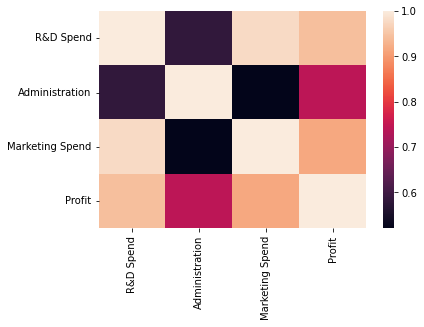

In [9]:
sns.heatmap(df.corr())

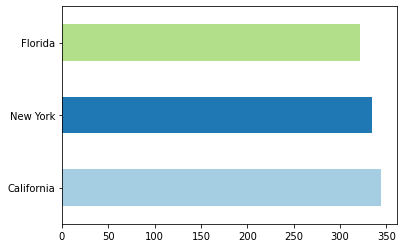

In [87]:
df['State'].value_counts().plot(kind='barh', 
                                color=plt.cm.Paired(np.arange(len(df['State']))),
                                label='States')


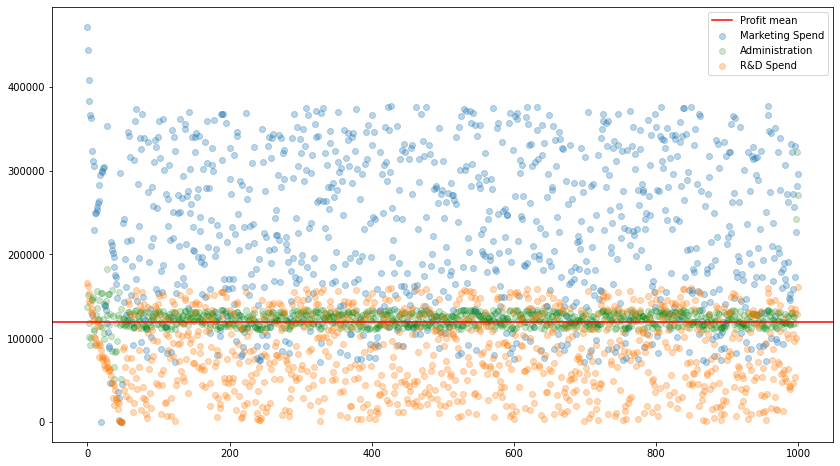

In [80]:
plt.figure(figsize=[14,8])
plt.scatter(df.index,df['Marketing Spend'], alpha=0.3, label='Marketing Spend')
plt.scatter(df.index,df['Administration'], alpha=0.2, color='green', label='Administration')
plt.scatter(df.index,df['R&D Spend'], alpha=0.3, label='R&D Spend')
plt.axhline(df['Profit'].mean(), color='red', label='Profit mean')
plt.legend(loc='upper right')

<h5 align='center'>Encoding categorical data</h5>
<hr size='2' color='black'>

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [20]:
from sklearn.compose import ColumnTransformer

In [35]:
lbl = LabelEncoder()

In [36]:
x[:,3] = lbl.fit_transform(x[:,3])

In [37]:
ct = ColumnTransformer([("State", OneHotEncoder(), [3])], remainder = 'passthrough')

In [38]:
x = ct.fit_transform(x)
x=x[:,1:]

In [58]:
print(x)

[[0.0 1.0 165349.2 136897.8 471784.1]
 [0.0 0.0 162597.7 151377.59 443898.53]
 [1.0 0.0 153441.51 101145.55 407934.54]
 ...
 [0.0 0.0 100275.47 241926.31 227142.82]
 [0.0 0.0 128456.23 321652.14 281692.32]
 [0.0 1.0 161181.72 270939.86 295442.17]]


<h4 align='center'>Prediction Multiple Linear Regression</h4>
<hr size='2' color='black'>

In [40]:
from sklearn.model_selection import train_test_split
#test 2%
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [41]:
#fitting multiple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [43]:
y_pred = regressor.predict(x_test)
print(y_pred)

[ 89790.61532915  88427.07187361  94894.67836971 175680.86725611
  83411.73042088 110571.90200074 132145.2293644   91473.37719686
 164597.05380607  53222.826674    66950.19050989 150566.43987005
 126915.20858596  59337.85971049 177513.91053062  75316.28143051
 118248.14406603 164574.40699902 170937.2898107  182069.11645085
 118845.03252689  85669.95112228 180992.59396144  84145.08220144
 105005.83769214 101233.56772746  53831.0766909   56881.41475223
  68896.39346904 210040.00765884 120778.72270894 111724.87157654
 101487.90541517 137959.02649624  63969.95996743 108857.91214126
 186014.72531988 171442.64130748 174644.26529205 117671.49128195
  96731.37857433 165452.2577941  107724.34331255  50194.54176912
 116513.89532179  58632.4898682  158416.4682761   78541.48521609
 159727.66671744 131137.87699644 184880.70924517 174609.0826688
  93745.66352059  78341.13383417 180745.9043908   84461.61490552
 142900.90602903 170618.44098397  84365.09530839 105307.3716218
 141660.07290787  52527.343

In [44]:
print('\nCoefficient:\n',regressor.coef_)
print('\n\nIntercept:\n',regressor.intercept_)


Coefficient:
 [-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]


Intercept:
 -51035.22972404538


<h5 align="center">R squared value<br>How good the prediction is</h5>


In [45]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred) #y_test it's the real values and more than 0.9 it's a good model

0.9112695892268894

Text(0.5, 1.0, '\nValues\n')

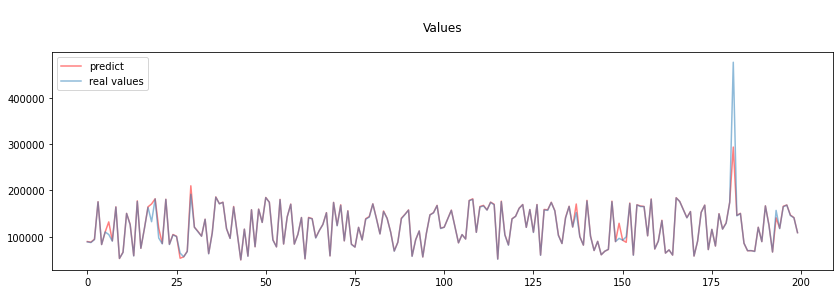

In [57]:
plt.figure(figsize=[14,4])
plt.plot(y_pred, label='predict', color='red', alpha=0.5)
plt.plot(y_test, label='real values', alpha=0.5)
plt.legend(loc='upper left')
plt.title('\nValues\n')